In [2]:
import numpy as np
import numpy.ma as ma
import six

In [3]:
from astroquery.simbad import Simbad
from astroquery.vizier import Vizier

In [4]:
import configparser

In [5]:
from astroquery.utils import TableList
from astropy.table import join, Table, hstack, vstack
import astropy.units as u
import astropy.constants as c

In [390]:
import datautils as ut
from importlib import reload
reload(ut)

<module 'datautils' from '/home/iliya/data/docs/Астрономия/Университет/курсовые/galdyn/mergedata/datautils.py'>

# Вытаскивание данных

In [7]:
bibcodes = configparser.ConfigParser()
bibcodes.read('bibcodes.dat')

['bibcodes.dat']

In [8]:
Vizier.ROW_LIMIT = -1
cats = list(Vizier.find_catalogs(bibcodes['surveys']["CarnIrV"]).keys())
carirv_tab = Vizier.get_catalogs(cats)[0]
#carirv_tab

Name,Morph,inc,logM_,V-I,Ratio,Bar,PapI_II,Simbad,NED,LEDA,_RA,_DE
,,deg,[Msun],mag,,,,,,,deg,deg
bytes12,bytes4,float32,float32,float32,float32,bytes9,bytes7,bytes6,bytes3,bytes4,float64,float64
ESO 009-G010,Sbc,45.63,10.79,1.22,0.01,unbarred,PapI+II,Simbad,NED,LEDA,264.88110,-85.31042
ESO 027-G001,SBc,45.01,10.22,0.90,0.14,unbuckled,PapI+II,Simbad,NED,LEDA,328.11014,-81.53076
ESO 060-G019,SBcd,46.03,9.80,1.08,0.19,unbuckled,PapI+II,Simbad,NED,LEDA,134.36142,-69.06004
ESO 091-G003,Sab,53.34,10.54,1.04,0.01,unbarred,PapI+II,Simbad,NED,LEDA,138.38171,-63.62643
ESO 121-G026,SBbc,44.94,10.98,1.15,0.03,barlens,PapI+II,Simbad,NED,LEDA,95.41148,-59.73989
ESO 136-G012,SBc,32.76,10.33,1.12,0.28,unbuckled,PapI+II,Simbad,NED,LEDA,240.64781,-61.77449
ESO 137-G034,S0/a,38.39,11.09,1.49,0.01,unbuckled,PapI+II,Simbad,NED,LEDA,248.80881,-58.08003
ESO 138-G010,Sd,47.18,10.42,1.36,0.09,unbarred,PapI+II,Simbad,NED,LEDA,254.76230,-60.21602


In [9]:
galaxies = carirv_tab["Name"]
#galaxies

ESO 009-G010
ESO 027-G001
ESO 060-G019
ESO 091-G003
ESO 121-G026
ESO 136-G012
ESO 137-G034
ESO 138-G010
ESO 138-G029
ESO 183-G030
ESO 186-G062


In [10]:
objfmtr = lambda x: "objname('{}')".format(x)
formattednames = np.array2string(
    galaxies[1:], separator=", ", max_line_width=np.inf,
    formatter = {'str_kind': objfmtr})
sqlwhereclause = "objname IN ({})".format(formattednames[1:-1])

In [393]:
from leda import Leda
leda_data = Leda.query_sqlwhere(sqlwhereclause)
#leda_data

In [394]:
from astroquery.ned import Ned
import nedpatch

def get_cosm_table(gal):
    tl = Ned.get_all_tables(gal)
    return tl['NED_DerivedValuesTable']

cosmology = []
for i,g in enumerate(galaxies):
    cosmology.append(get_cosm_table(g))
    print(i,g)

0 ESO 009-G010
1 ESO 027-G001
2 ESO 060-G019
3 ESO 091-G003
4 ESO 121-G026
5 ESO 136-G012
6 ESO 137-G034
7 ESO 138-G010
8 ESO 138-G029
9 ESO 183-G030
10 ESO 186-G062
11 ESO 208-G021
12 ESO 213-G011
13 ESO 221-G032
14 ESO 269-G057
15 ESO 271-G010
16 ESO 320-G026
17 ESO 321-G025
18 ESO 380-G001
19 ESO 380-G006
20 ESO 383-G087
21 ESO 384-G002
22 ESO 436-G027
23 ESO 440-G011
24 ESO 445-G089
25 ESO 479-G004
26 ESO 494-G026
27 ESO 506-G004
28 ESO 507-G025
29 ESO 556-G015
30 ESO 582-G012
31 IC 1953
32 IC 1954
33 IC 1993
34 IC 2006
35 IC 2035
36 IC 2051
37 IC 2056
38 IC 2367
39 IC 2522
40 IC 2537
41 IC 2560
42 IC 2627
43 IC 2764
44 IC 3253
45 IC 4214
46 IC 4329
47 IC 438
48 IC 4444
49 IC 4538
50 IC 4618
51 IC 4646
52 IC 4710
53 IC 4808
54 IC 4845
55 IC 4901
56 IC 4946
57 IC 4991
58 IC 5201
59 IC 5240
60 IC 5267
61 IC 5273
62 IC 5325
63 IC 5332
64 NGC 1022
65 NGC 1042
66 NGC 1068
67 NGC 1079
68 NGC 1084
69 NGC 1087
70 NGC 1090
71 NGC 1097
72 NGC 1179
73 NGC 1187
74 NGC 1201
75 NGC 1232
76 NGC 1

In [13]:
cosmology_data = vstack(cosmology, metadata_conflicts='silent')
cosmology_data['Name'] = galaxies

In [14]:
cosmology_data.info(out=None).show_in_notebook(display_length=-1)

idx,name,dtype,shape,unit,format,description,class,n_bad,length
0,heliocentric_velocity,float64,,km / s,{!r:>},The heliocentric radial velocity in km/sec,MaskedColumn,0,376
1,unc_heliocentric_velocity,float64,,km / s,{!r:>},"The uncertainty on the Heliocentric radial velocity in km/sec, when known.",MaskedColumn,1,376
2,refcode_heliocentric_velocity,object,,,,The reference code for the Heliocentric velocity,MaskedColumn,0,376
3,local_standard_rest_velocity,float64,,km / s,{!r:>},"The heliocentric radial velocity, corrected to the Local Standard of Rest (Kinematic) in km/sec",MaskedColumn,0,376
4,unc_local_standard_rest_velocity,float64,,km / s,{!r:>},"The uncertainty on the LSR radial velocity in km/sec, when known.",MaskedColumn,1,376
5,refcode_local_standard_rest_velocity,object,,,,The reference code for the LSR velocity,MaskedColumn,0,376
6,galactocentric_velocity,float64,,km / s,{!r:>},"The Galactocentric (GSR) radial velocity in km/sec, based on heliocentric redshift",MaskedColumn,0,376
7,unc_galactocentric_velocity,float64,,km / s,{!r:>},"The uncertainty on the Galactocentric (GSR) radial velocity in km/sec, when known.",MaskedColumn,0,376
8,refcode_galactocentric_velocity,object,,,,The reference code for the Galactocentric velocity,MaskedColumn,0,376
9,local_group_velocity,float64,,km / s,{!r:>},"Radial velocity, derived from the heliocentric redshift, in the Local Group reference frame.",MaskedColumn,0,376


In [383]:
dump_data(carirv = carirv_tab, leda = leda_data, cosmology = cosmology_data)

# Слияние

In [18]:
merged = hstack([
    ut.colselect(carirv_tab, exclude={'PapI_II', 'Simbad', 'NED','LEDA','_RA','_DE'}),
    ut.colselect(leda_data , exclude={'pgc', 'objname', 'col76'}),
    ut.colselect(cosmology_data, include={'luminosity_distance':'luminosity_distance', 'redshift_corrected':'z', 'cosmology_corrected_scale_kpc/arcmin':'scale'})
])
merged

Name,Morph,inc,logM_,V-I,Ratio,Bar,objtype,al1950,de1950,al2000,de2000,l2,b2,sgl,sgb,f_astrom,type,bar,ring,multiple,compactness,t,e_t,agnclass,logd25,e_logd25,logr25,e_logr25,pa,brief,e_brief,ut,e_ut,bt,e_bt,vt,e_vt,it,e_it,kt,e_kt,m21,e_m21,mfir,ube,bve,vmaxg,e_vmaxg,vmaxs,e_vmaxs,vdis,e_vdis,vrad,e_vrad,vopt,e_vopt,v,e_v,ag,ai,incl,a21,logdc,btc,itc,ubtc,bvtc,bri25,vrot,e_vrot,mg2,e_mg2,m21c,hic,vlg,vgsr,vvir,v3k,modz,e_modz,mod0,e_mod0,modbest,e_modbest,mabs,e_mabs,luminosity_distance,z,scale
,,deg,[Msun],mag,,,,h,deg,h,deg,deg,deg,deg,deg,,,,,,,,,,,,,,deg,mag / arcsec2,mag / arcsec2,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,mag,mag,deg,mag,,mag,mag,mag,mag,mag / arcsec2,km / s,km / s,mag,mag,mag,mag,km / s,km / s,km / s,km / s,mag,mag,mag,mag,mag,mag,mag,,Mpc,z,kpc / arcmin
bytes12,bytes4,float32,float32,float32,float32,bytes9,str1,float64,float64,float64,float64,float64,float64,float64,float64,int64,str4,str1,str1,str1,int64,float64,float64,str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ESO 009-G010,Sbc,45.63,10.79,1.22,0.01,unbarred,G,21.762925,-81.7650495,21.8740083,-81.53075,310.0306029,-32.9631384,212.444039,-9.5800733,0,SBc,B,--,--,--,5.0,0.4,--,1.433,0.025,0.089,0.026,135.08,22.762,0.309,--,--,12.23,0.2,--,--,10.88,0.095,9.172,0.064,13.664,0.154,11.367,--,0.92,52.46,1.44,--,--,--,--,2567.0,4.2,2557.3,29.6,2566.8,3.1,0.863,0.154,36.29,0.02,1.51,11.199,10.5,--,--,22.962,88.63,2.62,--,--,13.643,2.443,2367.7,2418.8,2304.0,2559.8,32.623,0.471,--,--,32.623,0.471,-21.424,0.512,33.9,0.008204,9.7
ESO 027-G001,SBc,45.01,10.22,0.90,0.14,unbuckled,G,8.9492615,-68.8655519,8.9574202,-69.060043,284.5383753,-15.0502495,193.8760368,-33.2968688,0,SBcd,B,--,--,--,6.9,0.6,--,1.566,0.031,0.418,0.048,167.02,22.364,0.305,--,--,12.8,0.2,--,--,11.65,0.1,10.359,0.176,13.055,0.151,12.035,--,0.94,86.49,1.39,--,--,--,--,1443.2,3.3,1421.6,36.7,1443.1,2.7,0.436,0.747,69.45,0.05,1.59,11.612,11.458,--,--,23.537,92.37,1.51,--,--,13.008,1.396,1150.5,1226.5,1154.9,1594.0,31.181,0.94,31.63,0.38,31.567,0.352,-19.955,0.405,35.4,0.008552,10.11
ESO 060-G019,SBcd,46.03,9.80,1.08,0.19,unbuckled,G,9.2075608,-63.4186168,9.2254467,-63.6263646,281.3721765,-10.3007006,188.155162,-36.4735219,0,Sab,--,--,--,--,2.3,0.6,--,1.377,0.027,0.182,0.026,76.95,22.042,0.307,--,--,13.03,0.2,--,--,10.805,0.09,8.682,0.04,14.772,0.212,13.248,--,--,153.23,5.05,--,--,--,--,1905.4,4.8,1903.7,29.9,1905.3,3.4,0.978,0.24,51.79,0.03,1.462,11.793,10.375,--,--,23.378,194.99,6.58,--,--,14.745,2.952,1602.4,1682.1,1623.8,2087.2,31.864,0.668,31.51,0.14,31.51,0.14,-19.717,0.244,21.9,0.005319,6.31
ESO 091-G003,Sab,53.34,10.54,1.04,0.01,unbarred,G,6.3497591,-59.714159,6.3607984,-59.7400048,268.8653129,-26.8711348,212.4426229,-45.54743,0,SBbc,B,--,--,--,3.9,0.5,--,1.382,0.029,0.131,0.023,112.02,22.079,0.305,--,--,12.59,0.2,--,--,10.868,0.06,9.022,0.043,13.622,0.164,12.521,--,0.95,135.29,1.47,--,--,--,--,2267.0,4.0,2254.4,21.4,2266.6,3.2,0.195,0.211,43.71,0.02,1.395,12.169,10.782,--,--,23.0,195.76,2.35,--,--,13.6,1.431,1996.1,2056.4,1955.2,2360.7,32.298,0.555,32.755,0.161,32.72,0.154,-20.551,0.253,28.8,0.006967,8.25
ESO 121-G026,SBbc,44.94,10.98,1.15,0.03,barlens,G,15.9705751,-61.6356518,16.0431861,-61.7744722,323.5905198,-6.8322223,187.5076814,5.3843606,0,SBc,B,--,--,--,5.1,0.5,--,1.476,0.056,0.287,0.074,119.31,--,--,--,--,--,--,--,--,--,--,10.539,0.122,13.921,0.128,12.441,--,--,93.24,2.61,--,--,--,--,4379.6,4.6,4337.7,50.1,43

In [20]:
merged.write('dat/merged.dat', format="ascii.ecsv", delimiter=",", overwrite=True)

In [19]:
merged.info(out=None).show_in_notebook(display_length=-1)  # а то он не умеет правильно таблицы печатать

idx,name,dtype,shape,unit,format,description,class,n_bad,length
0,Name,bytes12,,,,Identifier,MaskedColumn,0,376
1,Morph,bytes4,,,,Morphological type,MaskedColumn,0,376
2,inc,float32,,deg,{:5.2f},[0/70] Inclination measured in I band,MaskedColumn,0,376
3,logM_,float32,,[Msun],{:5.2f},[8/12]? Log stellar mass,MaskedColumn,11,376
4,V-I,float32,,mag,{:5.2f},[0/10] The (V-I) color index (1),MaskedColumn,0,376
5,Ratio,float32,,,{:5.2f},[0/1.1]? The H I mass to stellar mass ratio,MaskedColumn,11,376
6,Bar,bytes9,,,,Bar type (2),MaskedColumn,0,376
7,objtype,str1,,,,Type of object (G=galaxy; S=Star ...),MaskedColumn,1,376
8,al1950,float64,,h,,RA 1950 (hours decimal value),MaskedColumn,1,376
9,de1950,float64,,deg,,DEC 1950 (degrees decimal value),MaskedColumn,1,376


# Расчеты

In [384]:
t = merged
np.exp10 = lambda x: np.exp(np.log(10)*x)

t['M'] = (t['it']) - (t['modbest'])
t['M'].unit = u.mag
M_sun_I = 4.51 * u.mag #http://mips.as.arizona.edu/~cnaw/sun.html
t['L/L_sun'] = np.exp10(0.4*(M_sun_I - t['M']).value)
t['L/L_sun'].unit = u.L_sun
#t['stellar_mass'] = t['L/L_sun']
#Override 
t['Ms'] = np.exp10(t['logM_'])
t['Ms'].unit = u.M_sun
t['Ms'].format = '{:g}'

t['MHI'] = t['Ratio']* t['Ms']
t['MHI'].unit = u.M_sun
t['MHI'].format = '{:g}'


t['d25'] = np.exp10((t['logd25']))/10  # в десятых же выражен
t['d25'].unit = u.arcmin
t['radius'] = t['scale'] * t['d25']
t['radius'].unit = u.kpc
t['Mdyn'] = (1000*t['vrot'])**2 * t['radius'].to(u.m) / c.G / c.M_sun
#t['Mdyn'] = (1000*t['vrot'])**2 * t['radius'].to(u.m) / c.G / c.M_sun
t['Mdyn'].format = '{:g}'
t['Mdyn'].unit = u.M_sun
t['rel_halo_mass'] = (t['Mdyn'] - t['Ms'])/t['Ms']
t['rel_halo_mass'].format = '{:.2f}'


final = t[
    "Name", "Morph", "inc", "incl", "logM_", "V-I", "Ratio", "Bar", "type",
    "brief", "bri25", "itc", "kt", "mfir", "bve", "bvtc", "vrot", "m21c", "mod0", "mabs",
    "Ms", "MHI", "z", "scale", "d25", "radius",
    "Mdyn", "rel_halo_mass"
]
final

Name,Morph,inc,incl,logM_,V-I,Ratio,Bar,type,brief,bri25,itc,kt,mfir,bve,bvtc,vrot,m21c,mod0,mabs,Ms,MHI,z,scale,d25,radius,Mdyn,rel_halo_mass
,,deg,deg,[Msun],mag,,,,mag / arcsec2,mag / arcsec2,mag,mag,mag,mag,mag,km / s,mag,mag,mag,solMass,solMass,z,kpc / arcmin,arcmin,kpc,solMass,km / s
bytes12,bytes4,float32,float64,float32,float32,float32,bytes9,str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64
ESO 009-G010,Sbc,45.63,36.29,10.79,1.22,0.01,unbarred,SBc,22.762,22.962,10.5,9.172,11.367,0.92,--,88.63,13.643,--,-21.424,6.16595e+10,6.16595e+08,0.008204,9.7,2.710191631890844,26.288858829341187,4.80145e+10,-0.22
ESO 027-G001,SBc,45.01,69.45,10.22,0.90,0.14,unbuckled,SBcd,22.364,23.537,11.458,10.359,12.035,0.94,--,92.37,13.008,31.63,-19.955,1.65959e+10,2.32343e+09,0.008552,10.11,3.681289736425316,37.217839235259945,7.38332e+10,3.45
ESO 060-G019,SBcd,46.03,51.79,9.80,1.08,0.19,unbuckled,Sab,22.042,23.378,10.375,8.682,13.248,--,--,194.99,14.745,31.51,-19.717,6.30958e+09,1.19882e+09,0.005319,6.31,2.382319469358691,15.032435851653338,1.3289e+11,20.06
ESO 091-G003,Sab,53.34,43.71,10.54,1.04,0.01,unbarred,SBbc,22.079,23.0,10.782,9.022,12.521,0.95,--,195.76,13.6,32.755,-20.551,3.46737e+10,3.46737e+08,0.006967,8.25,2.4099054286865953,19.881719786664412,1.7715e+11,4.11
ESO 121-G026,SBbc,44.94,60.96,10.98,1.15,0.03,barlens,SBc,--,--,--,10.539,12.441,--,--,106.65,13.886,--,--,9.54991e+10,2.86497e+09,0.007877,9.32,2.99226463660819,27.887906413188333,7.37525e+10,-0.23
ESO 136-G012,SBc,32.76,41.13,10.33,1.12,0.28,unbuckled,SABa,24.084,24.467,10.821,8.272,--,--,--,186.9,14.402,--,-22.228,2.13796e+10,5.98629e+09,0.014913,17.5,5.284452517751808,92.47791906065663,7.51096e+11,34.13
ESO 137-G034,S0/a,38.39,48.69,11.09,1.49,0.01,unbuckled,Sd,23.219,23.917,--,8.292,11.868,0.84,--,123.33,11.974,--,-20.47,1.23027e+11,1.23027e+09,0.009376,11.07,5.888436553555895,65.18499264786375,2.30528e+11,0.87
ESO 138-G010,Sd,47.18,76.51,10.42,1.36,0.09,unbarred,S0-a,21.881,23.353,--,8.801,--,--,--,--,--,--,-21.761,2.63027e+10,2.36724e+09,0.003981,4.73,2.4099054286865953,11.398852677687596,--,--


In [391]:
ut.print_data(final=final)

In [343]:
tl = Ned.get_all_tables(galaxies[0])
tl[6]['diam_maj', 'diam_min']

diam_maj,diam_min
arcminutes,arcminutes
object,object
2.1,1.6


In [344]:
merged[0]['d25']

2.710191631890844

После этих махинаций единицы измерения уже не жизненно важны. Можно перебираться на `pandas`, с ним обычно удобнее работать

In [345]:
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
fin = final.to_pandas()

почему-то при конвертации таблиц из `astropy` в `pandas` строковые колонки превращаются в `bytes`.
Починим это дело

In [346]:
str_fin = fin.select_dtypes([np.object])
for col in str_fin:
    fin[col] = str_fin[col].str.decode("utf-8")
fin

,Name,Morph,inc,incl,logM_,V-I,Ratio,Bar,type,brief,bri25,itc,kt,mfir,bve,bvtc,vrot,m21c,mod0,mabs,Ms,MHI,z,scale,d25,radius,Mdyn,rel_halo_mass
0,ESO 009-G010,Sbc,45.630001,36.29,10.79,1.22,0.01,unbarred,NaN,22.762,22.962,10.500,9.172,11.367,0.920,NaN,88.63,13.643,NaN,-21.424,6.165946e+10,6.165946e+08,0.008204,9.70,2.710192,26.288859,4.801447e+10,-0.221296
1,ESO 027-G001,SBc,45.009998,69.45,10.22,0.90,0.14,unbuckled,NaN,22.364,23.537,11.458,10.359,12.035,0.940,NaN,92.37,13.008,31.630,-19.955,1.659589e+10,2.323425e+09,0.008552,10.11,3.681290,37.217839,7.383324e+10,3.448886
2,ESO 060-G019,SBcd,46.029999,51.79,9.80,1.08,0.19,unbuckled,NaN,22.042,23.378,10.375,8.682,13.248,NaN,NaN,194.99,14.745,31.510,-19.717,6.309576e+09,1.198819e+09,0.005319,6.31,2.382319,15.032436,1.328902e+11,20.061668
3,ESO 091-G003,Sab,53.340000,43.71,10.54,1.04,0.01,unbarred,NaN,22.079,23.000,10.782,9.022,12.521,0.950,NaN,195.76,13.600,32.755,-20.551,3.467369e+10,3.467369e+08,0.006967,8.25,2.409905,19.881720,1.771498e+11,4.109056
4,ESO 121-G026,SBbc,44.939999,60.96,10.98,1.15,0.03,barlens,NaN,NaN,NaN,NaN,10.539,12.441,NaN,NaN,106.65,13.886,NaN,NaN,9.549913e+10,2.864974e+09,0.007877,9.32,2.992265,27.887906,7.375247e+10,-0.227716
5,ESO 136-G012,SBc,32.759998,41.13,10.33,1.12,0.28,unbuckled,NaN,24.084,24.467,10.821,8.272,NaN,NaN,NaN,186.90,14.402,NaN,-22.228,2.137961e+10,5.986292e+09,0.014913,17.50,5.284453,92.477919,7.510962e+11,34.131422
6,ESO 137-G034,S0/a,38.389999,48.69,11.09,1.49,0.01,unbuckled,NaN,23.219,23.917,NaN,8.292,11.868,0.840,NaN,123.33,11.974,NaN,-20.470,1.230270e+11,1.230270e+09,0.009376,11.07,5.888437,65.184993,2.305282e+11,0.873802
7,ESO 138-G010,Sd,47.180000,76.51,10.42,1.36,0.09,unbarred,NaN,21.881,23.353,NaN,8.801,NaN,NaN,NaN,NaN,NaN,NaN,-21.761,2.630269e+10,2.367242e+09,0.003981,4.73,2.409905,11.398853,NaN,NaN
8,ESO 138-G029,S0/a,51.759998,41.40,11.46,0.00,0.00,unbuckled,NaN,NaN,23.202,9.843,8.353,NaN,0.990,0.858,NaN,NaN,NaN,-20.663,2.884030e+11,0.000000e+00,0.015572,18.26,2.333458,42.608944,NaN,NaN
9,ESO 183-G030,E/S0,40.380001,28.49,11.04,1.36,0.01,unbarred,NaN,23.039,23.434,NaN,10.336,13.064,NaN,NaN,117.63,15.100,NaN,-20.034,1.096479e+11,1.096479e+09,0.008774,10.37,2.306747,23.920968,7.695802e+10,-0.298135


In [357]:
selected = fin[['Name', 'Bar', 'Mdyn','MHI', 'vrot', 'Ms']].dropna()
selected

,Name,Bar,Mdyn,MHI,vrot,Ms
0,ESO 009-G010,unbarred,4.801447e+10,6.165946e+08,88.63,6.165946e+10
1,ESO 027-G001,unbuckled,7.383324e+10,2.323425e+09,92.37,1.659589e+10
2,ESO 060-G019,unbuckled,1.328902e+11,1.198819e+09,194.99,6.309576e+09
3,ESO 091-G003,unbarred,1.771498e+11,3.467369e+08,195.76,3.467369e+10
4,ESO 121-G026,barlens,7.375247e+10,2.864974e+09,106.65,9.549913e+10
5,ESO 136-G012,unbuckled,7.510962e+11,5.986292e+09,186.90,2.137961e+10
6,ESO 137-G034,unbuckled,2.305282e+11,1.230270e+09,123.33,1.230270e+11
9,ESO 183-G030,unbarred,7.695802e+10,1.096479e+09,117.63,1.096479e+11
11,ESO 208-G021,unbuckled,1.626235e+11,9.354698e+08,201.26,4.677349e+10
12,ESO 213-G011,unbarred,5.895364e+10,1.849784e+09,96.23,6.165946e+10


# Распределения

какая-то встроенная статистика, можно поглядывать иногда сюда

In [358]:
by_bar = selected.groupby('Bar')
by_bar.describe()

MHI                                                                                            Mdyn                                                                                                       Ms                                                                                                     vrot                                                                   
           count          mean           std  min           25%           50%           75%           max  count          mean           std           min           25%           50%           75%           max  count          mean           std           min           25%           50%           75%           max  count        mean        std    min       25%      50%       75%     max
Bar                                                                                                                                                                                                                                                                                                                                                                                                  
B/PS        34.0  3.515003e+09  3.044265e+09  0.0  1.207033e+09  2.773734e+09  4.948893e+09  1.345768e+10   34.0  2.416684e+11  2.115737e+11  1.262050e+10  6.343698e+10  1.725609e+11  3.909340e+11  8.066139e+11   34.0  1.115570e+11  8.480941e+10  2.290865e+10  5.593665e+10  8.035788e+10  1.231233e+11  4.073804e+11   34.0  157.976176  62.165402  48.38  104.9025  152.245  211.7200  287.83
barlens     55.0  5.494803e+09  5.256010e+09  0.0  2.390909e+09  3.733021e+09  7.121564e+09  2.965244e+10   55.0  2.824911e+11  2.543493e+11  8.076683e+09  8.386817e+10  1.879622e+11  3.914165e+11  1.110230e+12   55.0  1.386500e+11  1.158363e+11  1.995264e+10  7.081336e+10  1.047130e+11  1.678915e+11  7.413110e+11   55.0  177.910909  84.801154  31.88  120.1600  168.210  220.1150  529.45
unbarred    90.0  4.409429e+09  5.195787e+09  0.0  1.102864e+09  2.286391e+09  6.138487e+09  2.877202e+10   90.0  4.695693e+11  1.658190e+12  2.407615e+09  6.614889e+10  1.467828e+11  2.767678e+11  1.274669e+13   90.0  1.204659e+11  1.117584e+11  4.168695e+08  4.519465e+10  8.222971e+10  1.621811e+11  5.754404e+11   90.0  167.171222  82.967471  20.80  108.7225  161.630  219.7375  487.41
unbuckled  131.0  2.465997e+09  3.661144e+09  0.0  6.702780e+08  1.429220e+09  2.941462e+09  2.938671e+10  131.0  1.693055e+11  1.582465e+11  2.881978e+09  5.983128e+10  1.179647e+11  2.217905e+11  7.510962e+11  131.0  5.480190e+10  6.137798e+10  1.862088e+08  1.567686e+10  3.801897e+10  7.415064e+10  4.897785e+11  131.0  157.411603  53.649982  42.82  119.0400  152.250  195.4150  282.09

/usr/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


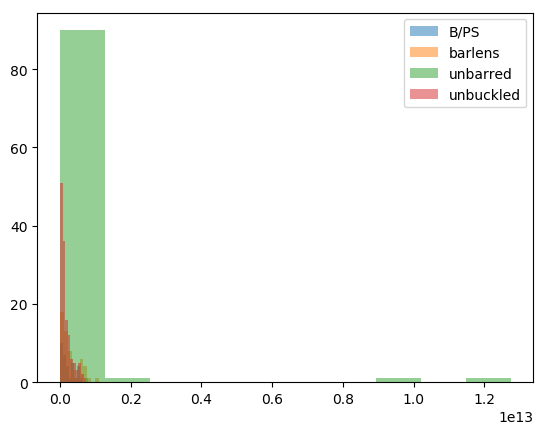

In [359]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
for name, group in fin_by_bar:
    plt.hist(group['Mdyn'], alpha=0.5, label=name)
plt.legend()
plt.show()

Как видно, гистограмма немного странная. Особенно вон те выбросы дальше $0.4\cdot10^{13}$.
Причем они только для `unbarred`.
Можно посмотреть что на то, что это за галактики

In [360]:
unbarred = by_bar.get_group('unbarred')
weird = unbarred.loc[unbarred['Mdyn'] > 1e12]
weird

,Name,Bar,Mdyn,MHI,vrot,Ms
276,NGC 5324,unbarred,9.589524e+12,7.943277e+08,349.04,7.943278e+10
282,NGC 5516,unbarred,1.274669e+13,2.877202e+10,487.41,5.754404e+11
320,NGC 6861,unbarred,1.143541e+12,7.621842e+09,394.77,1.905461e+11
347,NGC 7392,unbarred,1.432657e+12,6.792973e+09,335.89,1.698243e+11


In [361]:
fin[fin['Name'].isin(weird['Name'].values)]

,Name,Morph,inc,incl,logM_,V-I,Ratio,Bar,type,brief,bri25,itc,kt,mfir,bve,bvtc,vrot,m21c,mod0,mabs,Ms,MHI,z,scale,d25,radius,Mdyn,rel_halo_mass
276,NGC 5324,Sc,24.980000,47.27,10.90,1.13,0.01,unbarred,NaN,22.524,23.586,NaN,3.968,7.185,1.140,0.872,349.04,12.565,27.828,-20.550,7.943278e+10,7.943277e+08,0.011098,13.08,25.882129,338.538249,9.589524e+12,119.725025
282,NGC 5516,E/S0,45.939999,14.08,11.76,1.61,0.05,unbarred,NaN,21.263,22.204,NaN,4.637,6.946,0.720,0.588,487.41,9.309,28.450,-20.945,5.754404e+11,2.877202e+10,0.014435,16.95,13.614447,230.764874,1.274669e+13,21.151193
320,NGC 6861,E/S0,42.270000,30.15,11.28,1.54,0.04,unbarred,NaN,20.905,22.921,9.479,7.536,10.517,0.900,0.730,394.77,14.433,NaN,-21.713,1.905461e+11,7.621842e+09,0.008984,10.62,2.971666,31.559093,1.143541e+12,5.001388
347,NGC 7392,SBbc,55.180000,39.09,11.23,1.21,0.04,unbarred,NaN,20.661,23.045,NaN,7.085,11.792,0.925,0.842,335.89,13.608,NaN,-21.051,1.698243e+11,6.792973e+09,0.009555,11.28,4.841724,54.614643,1.432657e+12,7.436111


$\texttt{d25} = 25'$ и $13'$ это что-то очень странное. Кажется, здесь просто ошибки в `hyperleda` 

Например для `NGC 5516` из `NED`

![](./neddata5516.png)

а вот эта мысль не очень понятная, потому что космологический масштаб $0.218 \text{kpc}/''$
```
NOTE: Physical diameters are derived using a scale of 0.3320 kpc/arcsec based on 
Average NED-D Metric Distance of (68.475 +/- 6.300) Mpc.
The quantities quoted above have not necessarily been corrected for foreground extinction. 
```

пока просто отсеял скорее всего ошибочные галактики.

In [362]:
filtered = selected[~selected['Name'].isin(weird['Name'].values)]
fby_bar = filtered.groupby('Bar')

## По $M_{dyn}$

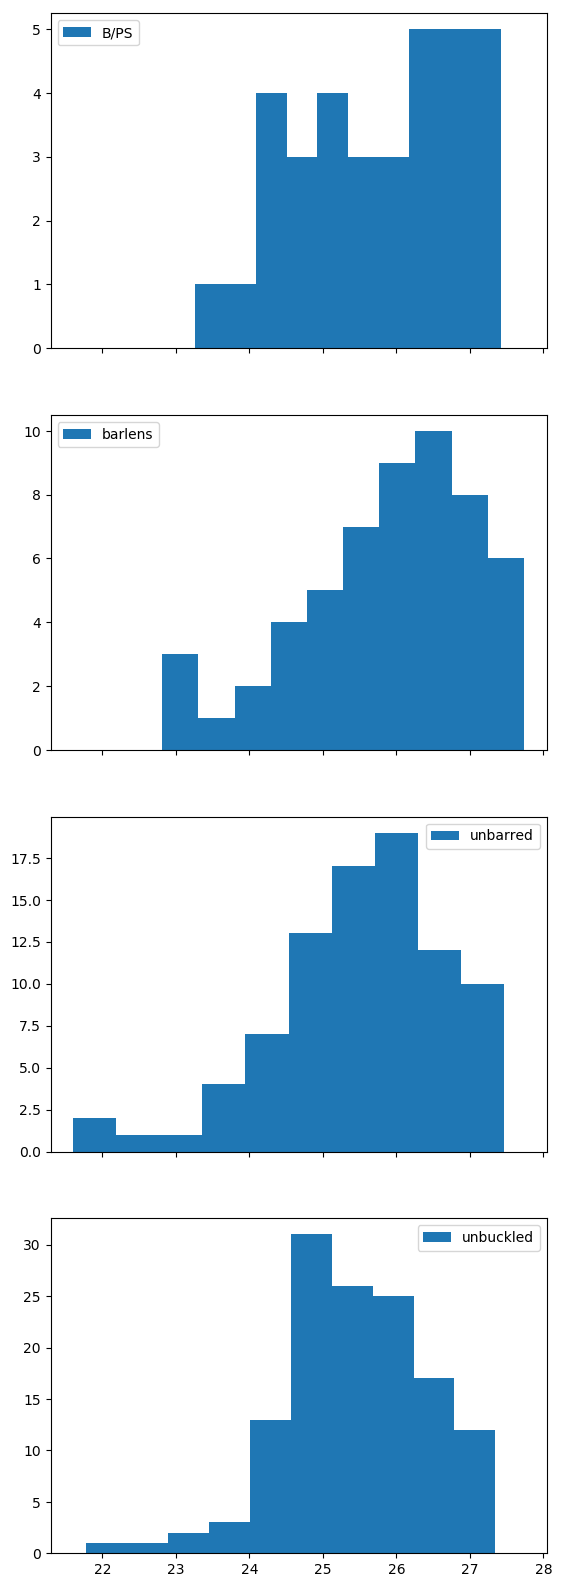

In [363]:
fig, ax = plt.subplots(4, sharex=True) 
for i, (name, group) in enumerate(fby_bar):
    ax[i].hist(np.log(group['Mdyn']), label=name)
    ax[i].legend()
fig.set_figheight(20)

# По $v_{rot}$

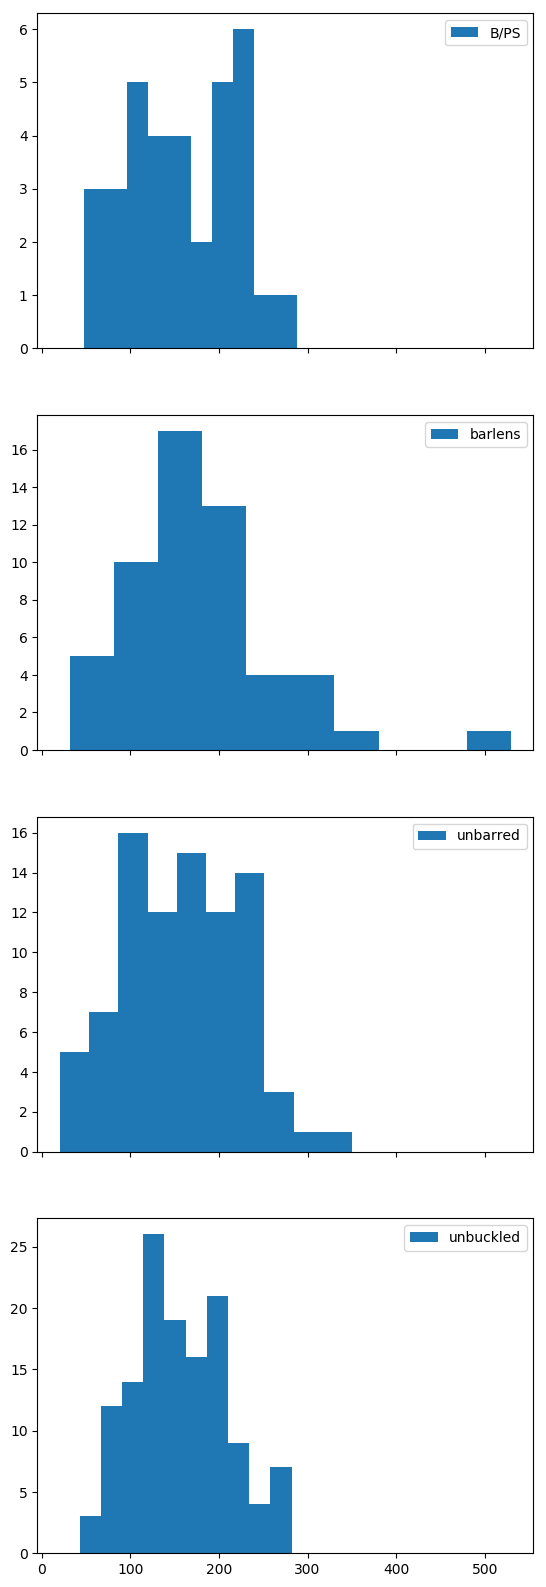

In [367]:
fig, ax = plt.subplots(4, sharex=True) 
for i, (name, group) in enumerate(fby_bar):
    ax[i].hist(group['vrot'], label=name, bins=10)
    ax[i].legend()
fig.set_figheight(20)

In [354]:
#fig, ax = plt.subplots(4, sharex=True) 
#for i, (name, group) in enumerate(fby_bar):
#    ax[i].hist(np.log(1+(group['Mdyn']-group['Ms'])/group['Ms']), label=name, bins=10)
#    ax[i].legend()
#fig.set_figheight(20)

## Масса-скорость

### $v_{rot} (M_*)$

Text(0, 0.5, 'v_rot')

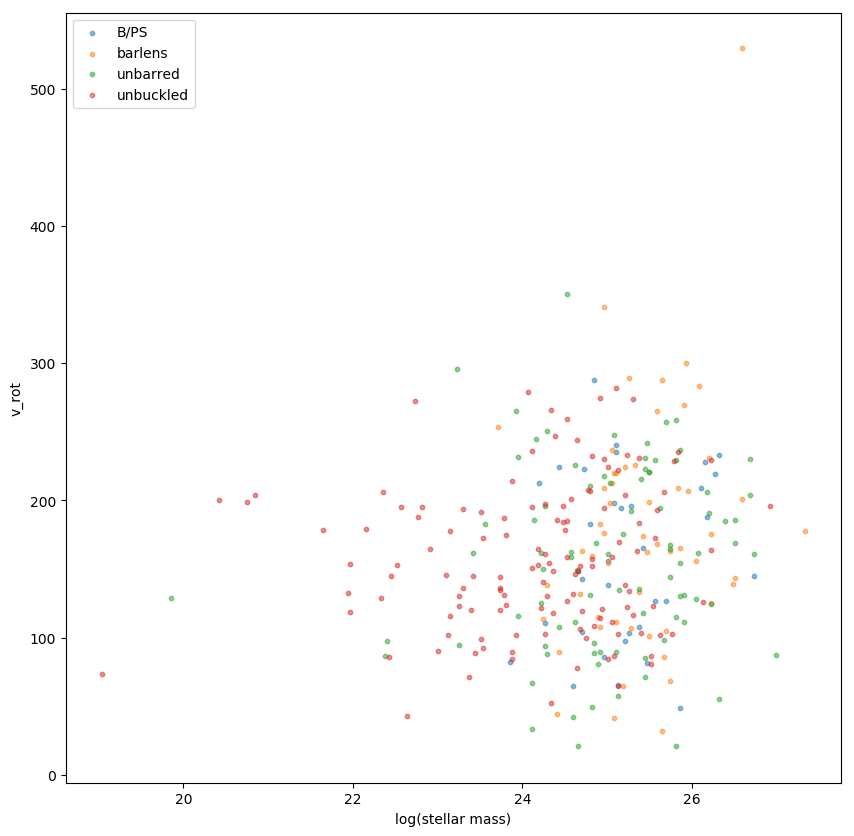

In [368]:
plt.figure(figsize=(10,10))
for i, (name, group) in enumerate(fby_bar):
    plt.scatter(np.log(group['Ms']), group['vrot'], label=name, alpha = 0.5, s=10)
plt.legend()
plt.xlabel('log(stellar mass)')
plt.ylabel('v_rot')

### $v_{rot}(M_{HI})$

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'v_rot')

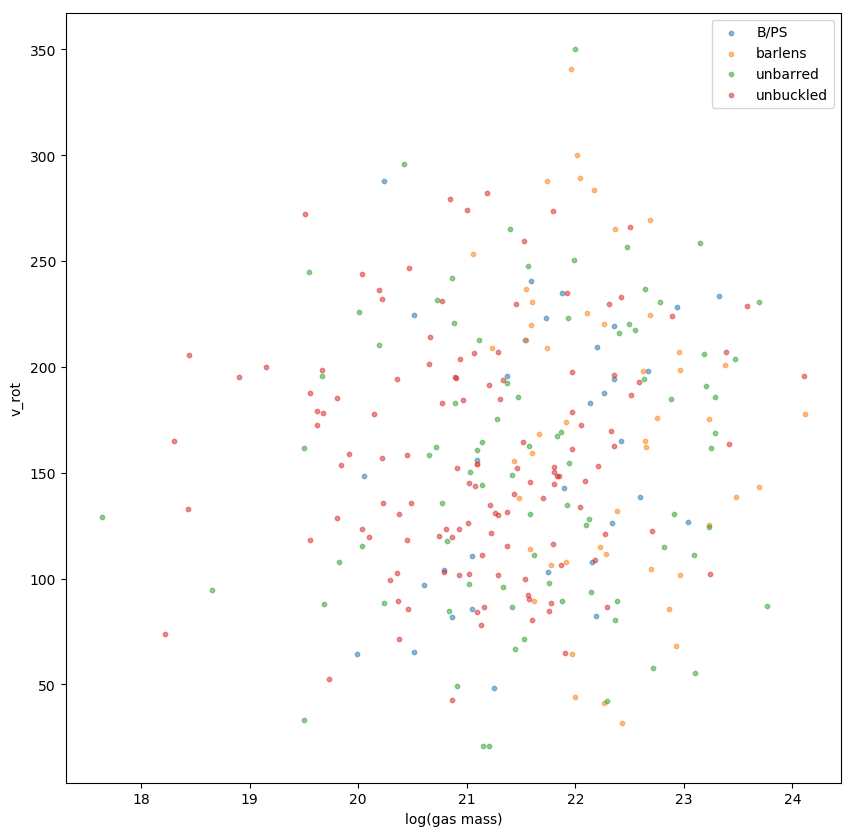

In [392]:
plt.figure(figsize=(10,10))
for i, (name, group) in enumerate(fby_bar):
    plt.scatter(np.log(group['MHI']), group['vrot'], label=name, alpha = 0.5, s=10)
plt.legend()
plt.xlabel('log(gas mass)')
plt.ylabel('v_rot')